# Example usage of trainer class

In [1]:
# autoreload after code has changed
%load_ext autoreload
%autoreload 2

In [2]:
import os

# move into the correct dirrectory, e.g. move up one directory level iif this cell is run for the first time
try:
    a = first_time
except NameError:
    print("Running first time, moving up one dir level")
    os.chdir('..')  # Move up one directory level to the root directory of project
    first_time = False

print("This path should be the root directory of the project: ", os.getcwd())
    


Running first time, moving up one dir level
This path should be the root directory of the project:  /home/daniels/Documents/uni/ADLR/tum-adlr-02


## Define Dataset
Creating the dataset object and applzing transformations to the data.

In [3]:
from data.model_classes import Mug, Bottle
from data.dataconverter import DataConverter

# generate data
dataconverter = DataConverter(
    classes=[Mug(),Bottle()],
    min_order = 1, #small parameter amounts for testing
    tact_order = 2,
    rand_rotations=2
    
)
# set regenerate to true, if you run this after changes in dataconverter have been made
#dataconverter.generate_2d_dataset(show_results=False, regenerate=False)


In [4]:
from data.reconstruction_dataset import *

csv_file = './datasets/2D_shapes/annotations.csv'
root_dir = './datasets/2D_shapes'
#composed = transforms.Compose([RandomOrientation(),
#                               ToTensor()])

dataset = ReconstructionDataset(csv_file=csv_file,
                                root_dir=root_dir)#,
                                #transform=composed)

Examplary data pairs:

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


<Figure size 640x480 with 0 Axes>

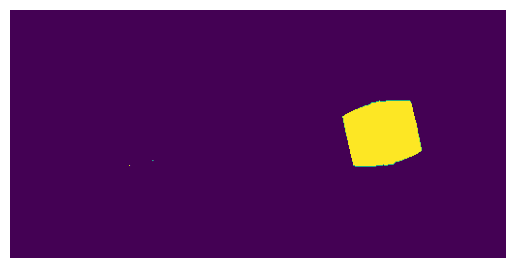

In [5]:
example_data = dataset[5]

plt.figure()
print(example_data['image'])
show_datapair(example_data['image'], example_data['label'])
plt.show()

## Choose Hyperparamters

Look into the file neural_nets.trainer to see which hyperparameters you can choose.
The seperation into tunable and non tunable hyperparameters is made, because this makes parameter searches with ray easier.


#### Non Tunable Hyperparameters


In [6]:
from neural_nets.trainer import NonTHparams


nt_h = NonTHparams()
nt_h.num_epochs = 50
nt_h.train_prop = 0.9

nt_h.log_train_period = 1
nt_h.log_val_freq = 1


#### Tunable Hyperparameters

In [7]:
import torch.nn as nn
import torch.optim as optim

from neural_nets.trainer import THparams
from neural_nets.weight_inits import weight_init_kx
from neural_nets.models.unet import UNet2


t_h = THparams()
t_h.batch_size = 16

t_h.model = UNet2
t_h.weight_init = weight_init_kx
t_h.depth = 5
t_h.channels = 64
t_h.first_kernel_size = 41

t_h.lr = 1e-4
t_h.optimizer = optim.Adam
t_h.loss_func = nn.BCELoss()




## Initialize Trainer

In [8]:
from neural_nets.trainer import Trainer

trainer = Trainer(nt_h,t_h, dataset)



During training, progress will be logged to tensorboard. Go to project folder, activate appropriateconda environment and run 'tensorboard --logdir runs/' to see the logs.


/home/daniels/Documents/uni/ADLR/tum-adlr-02/neural_nets/trainer.py:114: UserWarning: Cuda is not available, device used instead: cpu
  warnings.warn("Cuda is not available, device used instead: " + str(self.device))


## Training

In [ ]:
trainer.train()

/home/daniels/Documents/uni/ADLR/tum-adlr-02/neural_nets/trainer.py:141: UserWarning: Cuda is not available, device used instead: cpu
  warnings.warn("Cuda is not available, device used instead: " + str(self.device))


Total trainable parameters: 28094465


/home/daniels/.conda/envs/adlr/lib/python3.10/site-packages/ray/train/_internal/session.py:651: UserWarning: `get_checkpoint` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(


Epoch [1/50], Step [1/1443], Train Loss: 0.6927 , Logging Time Proportion: 0.0004, Data Loading Time Proportion: 0.0000
Epoch [1/50], Step [2/1443], Train Loss: 0.6788 , Logging Time Proportion: 0.0007, Data Loading Time Proportion: 0.0000
Epoch [1/50], Step [3/1443], Train Loss: 0.6485 , Logging Time Proportion: 0.0006, Data Loading Time Proportion: 0.0000
Epoch [1/50], Step [4/1443], Train Loss: 0.5738 , Logging Time Proportion: 0.0007, Data Loading Time Proportion: 0.0000
Epoch [1/50], Step [5/1443], Train Loss: 0.4500 , Logging Time Proportion: 0.0005, Data Loading Time Proportion: 0.0000
Epoch [1/50], Step [6/1443], Train Loss: 0.5574 , Logging Time Proportion: 0.0005, Data Loading Time Proportion: 0.0000
Epoch [1/50], Step [7/1443], Train Loss: 0.4212 , Logging Time Proportion: 0.0005, Data Loading Time Proportion: 0.0000
Epoch [1/50], Step [8/1443], Train Loss: 0.3680 , Logging Time Proportion: 0.0007, Data Loading Time Proportion: 0.0000
Epoch [1/50], Step [9/1443], Train Loss: